<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*


# Machine Learning from Data - IDC 2022
## HW5 - Question 5 - SVMs
### Instructions

The objective of this exercise is to allow you to experiment with how different slack coefficients (refered to as `C` values in this notebook) affect the SVM model, and in particular, the train and test accuracy.  

The provided code below generates data, fits an SVM model, plots the SVMs with the margin, and plots the accuracies as a function of `C`.    

Currently, the code runs for only 2 values of `C`. 
Your task is to add at least 5 values to the `Cs` array indicated below, in order to achieve the desired accuracy graph that appears at the bottom of the notebook.  
Your graph does not need to be identical, but should present similar behavior as appears in the desired graph.  

**When you are finished, take a screenshot of your achieved graph and paste it into your submission PDF along with your responses to the theoretical questions. DO NOT submit your code.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
import seaborn as sns; sns.set()

In [2]:
# plotting function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='k', facecolors='None');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
# generating our data - do not change!
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=1)
test_size = 100
X_test, y_test = X[test_size:], y[test_size:]
X, y = X[:test_size], y[:test_size]
outliers = [[0,1], [-0.5, 1.5], [-0.6, 1.2], [0, 0.9], [0,-1], [-0.5, -0.5], [-0.6, -0.2], [0, -1.9]]
X = np.append(X, outliers, axis=0)
y = np.append(y, [0, 0, 0, 0, 0, 0, 0, 0])


### Array of `C` values
Add at least 5 values to the list in the cell below.

In [14]:
# add at least 5 values to this list to achieve the desired accuracy graph at the bottom of the notebook

Cs = [0.0005, 0.0008, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5]#, 1, 10]


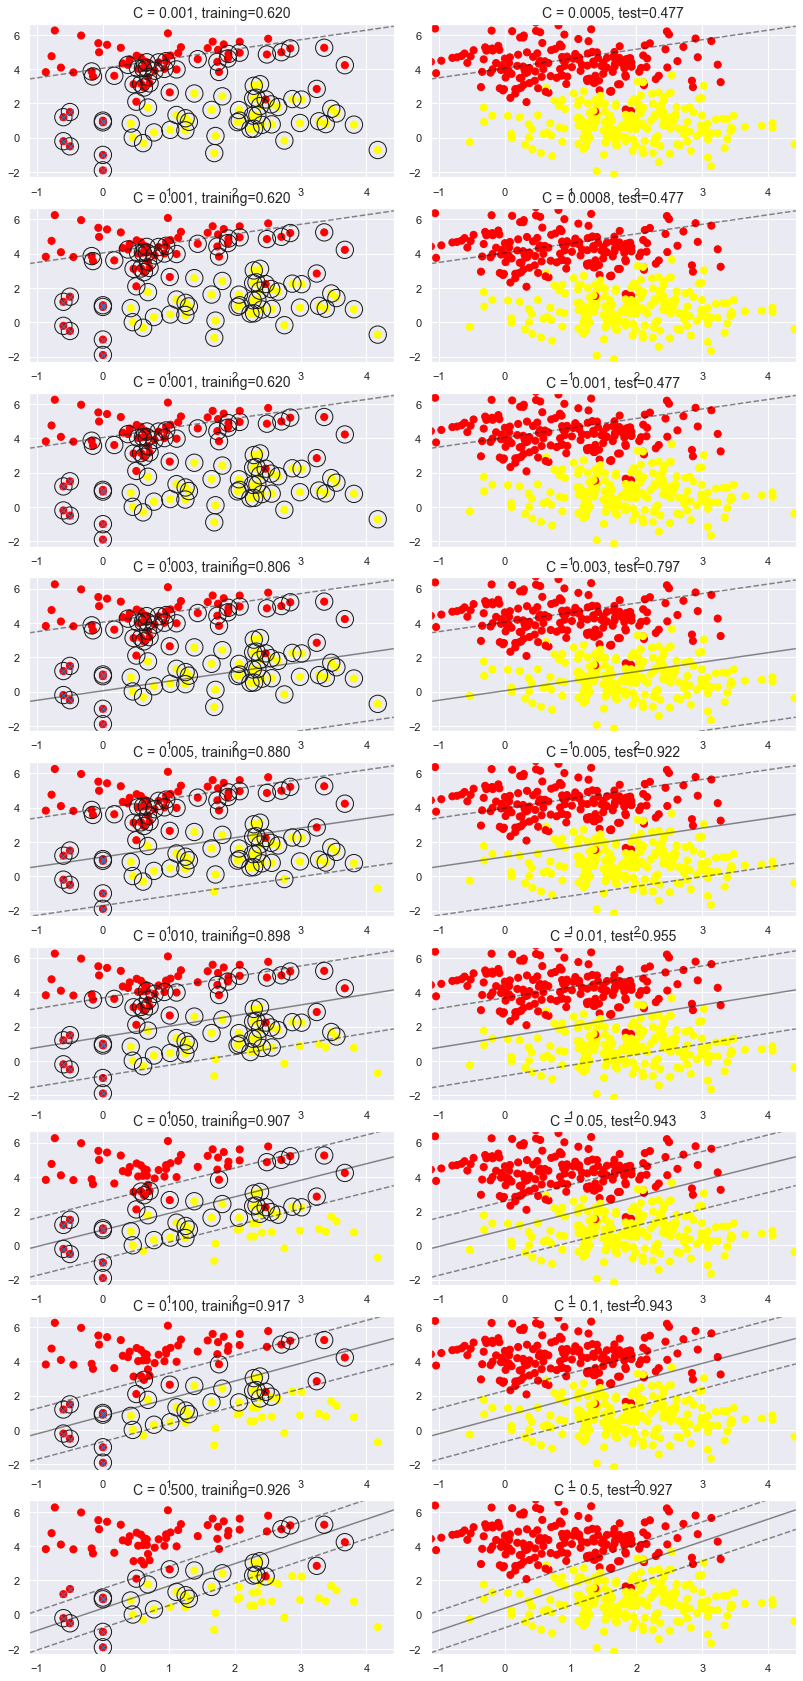

In [15]:
# note that as you add more C values, this cell will generate more graphs

train_acc_list = []
test_acc_list = []


fig, ax = plt.subplots(len(Cs), 2, figsize=(12, 30))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, (axi, C) in enumerate(zip(ax[:, 0], Cs)):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    xlim = axi.get_xlim()
    ylim = axi.get_ylim()
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {:.3f}, training={:.3f}'.format(C, model.score(X, y)), size=14)
    axi1 = ax[i, 1]
    axi1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
    
    ###
    train_acc = model.score(X,y)
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    P = model.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    axi1.contour(XX, YY, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
#     plot_svc_decision_function(model, axi)
#     axi.scatter(model.support_vectors_[:, 0],
#                 model.support_vectors_[:, 1],
#                 s=300, lw=1, facecolors='none');
    xlim1 = axi.get_xlim()
    ylim1 = axi.get_ylim()
    xlim = [min(xlim[0], xlim1[0]), max(xlim[1], xlim1[1])]
    axi.set_xlim(xlim)
    axi1.set_xlim(xlim)
    ylim = [min(ylim[0], ylim1[0]), max(ylim[1], ylim1[1])]
    axi.set_ylim(ylim)
    axi1.set_ylim(ylim)
    axi1.set_title('C = {}, test={:.3f}'.format(C, model.score(X_test, y_test)), size=14)
    
    ###
    test_acc = model.score(X_test, y_test)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
#     outliers = [[0,1], [-0.5, 1.5], [-0.6, 1.2], [0, 0.9]]

    axi.plot([0,-0.5, -0.6, 0, 0,-0.5, -0.6, 0],[1, 1.5, 1.2, 0.9, -1, -0.5, -0.2, -1.9], 'bx')
    
    

### Your graph
**Below is your graph that you want to make similar to the desired graph.  
When you are finished, this is the graph you screenshot and add to your submission.  
Make sure your `C` values (along the x-axis) are visible in the screenshot.**

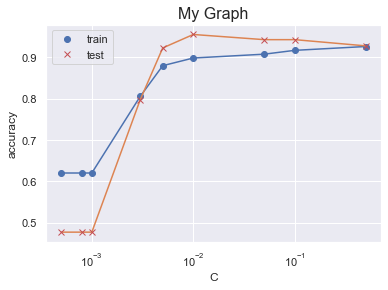

In [16]:
plt.plot(Cs, train_acc_list)
plt.plot(Cs, train_acc_list, 'bo', label='train')

plt.plot(Cs, test_acc_list)
plt.plot(Cs, test_acc_list, 'rx', label = 'test')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.grid('both')
# ticks = [0.0005, 0.0008, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5]
plt.xticks(np.linspace(10**-4, 10**0))
plt.xscale('log')
_=plt.title('My Graph', fontdict={'size':'16'})

### Desired accuracy graph
Below is the graph you want to immitate.

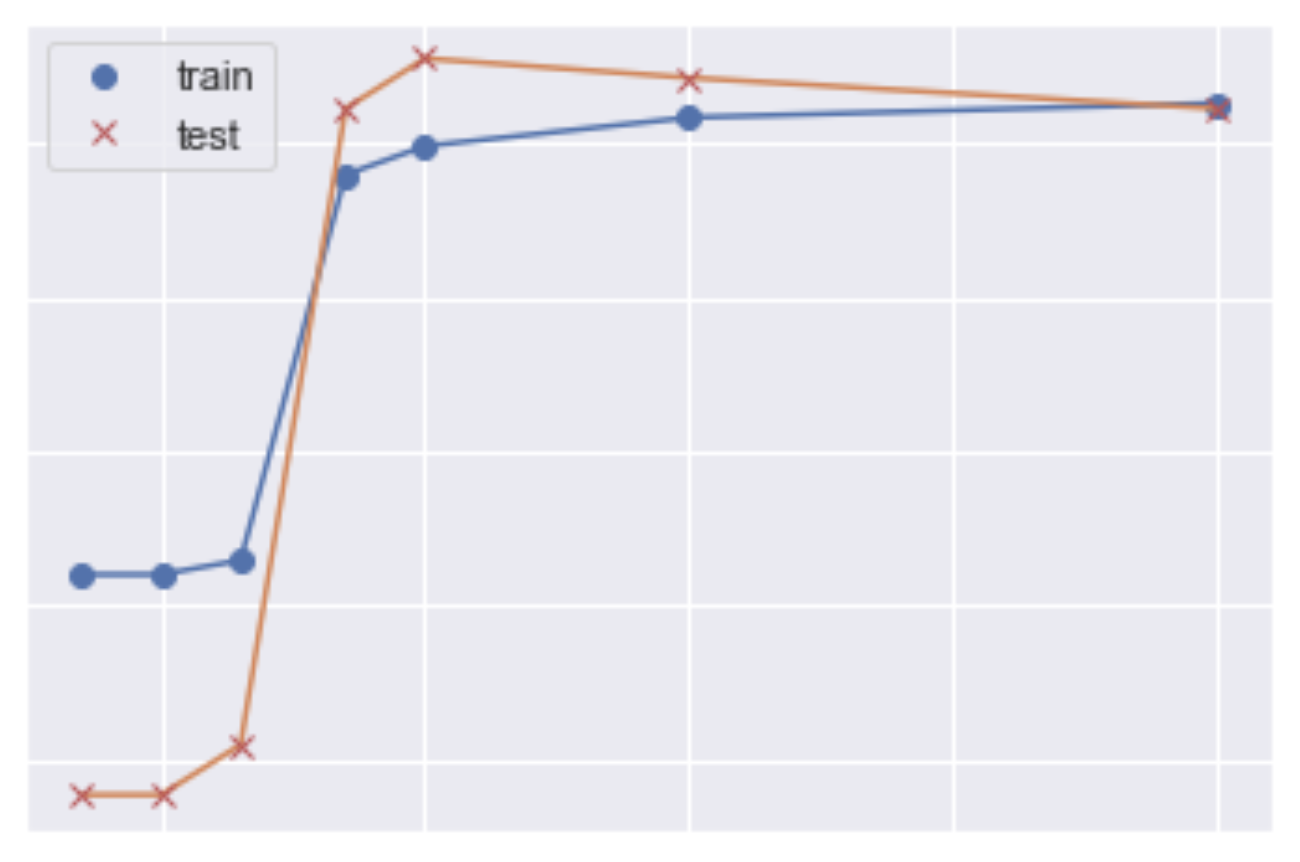

In [7]:
from IPython.display import Image
Image(filename='desired_graph.png', width=400, height = 200)

u: [0.8660254 0.5      ]
v: [ 0 -1]
w: [-0.8660254  0.5      ]
r: 2
ps = 4177, ps / total samples = 0.20885
samples=20000
bound=5


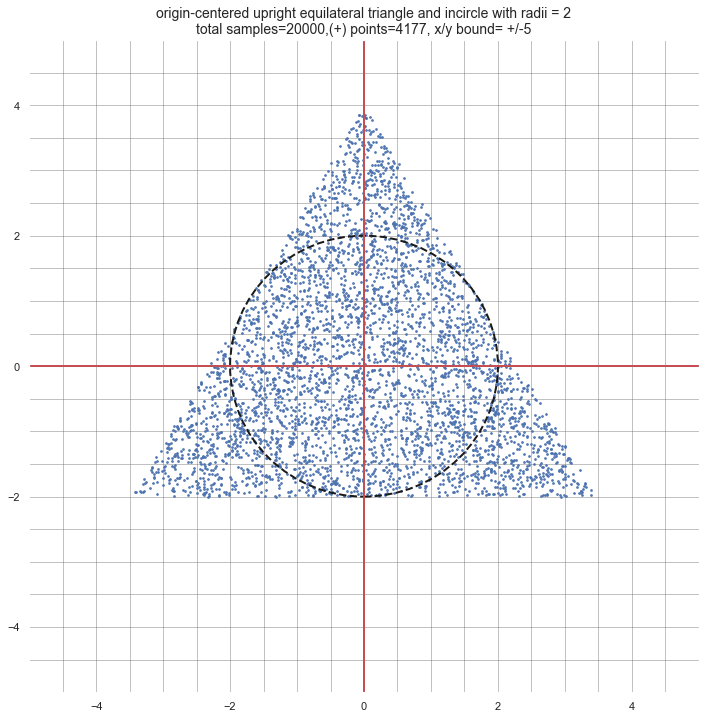

In [8]:
import numpy as np
import matplotlib.pyplot as plt

u = np.array([np.sqrt(3)/2, 0.5])
w = np.array([-np.sqrt(3)/2, 0.5])
v = np.array([0, -1])
print(f'u: {u}')
print(f'v: {v}')
print(f'w: {w}')

r = 2
print(f'r: {r}')

def constraint(p):
  return p.dot(u)<=r and p.dot(v)<=r and p.dot(w)<=r

size=400000 // 20 # num of points to generate
bound=5 # low/high bound for the value of x/y

# generate random x/y
xs = np.random.uniform(low=-bound, high=bound, size=size)
ys = np.random.uniform(low=-bound, high=bound, size=size)

# filter points which satisfy constraints
ps = [(xs[i], ys[i]) for i in range(size) if constraint(np.array([xs[i], ys[i]]))]
ps = np.array(ps)
print(f'ps = {ps.shape[0]}, ps / total samples = {ps.shape[0]/size}\nsamples={size}\nbound={bound}')

# split to xs/ys to plot
xs = ps[:, 0]
ys = ps[:, 1]

# plt.figure(figsize=(12,8))
plt.rcParams["figure.facecolor"] = "w"
fig, ax = plt.subplots()
fig.set_facecolor('white')
fig.set_size_inches(12,12)

plt.scatter(xs, ys, s=3, alpha=0.9)
plt.grid(b=True, which='both', color='#666666', linestyle='-', alpha=0.4) #color='k', linewidth=5, 
plt.minorticks_on()
# plt.plot([-2,-1.5,0,2.5], [-2,-1.5,2,-1.5])
plt.axhline(y=0, color='r', linewidth=2)#, linestyle=':')
plt.axvline(x=0, color='r', linewidth=2)#, linestyle=':')
plt.xlim(-bound,bound)
plt.ylim(-bound,bound)
a_circ = plt.Circle((0,0),r, fill=False, color='k', linewidth=2, linestyle='--')
ax.add_artist(a_circ)
# a_tri = plt.triplot(xs,ys,color='k', linewidth=5)
# ax.add_artist(a_tri)
ax.set_facecolor('w')
plt.title(f"origin-centered upright equilateral triangle and incircle with radii = {r}\ntotal samples={size},(+) points={ps.shape[0]}, x/y bound= +/-{bound}", fontsize=14)
plt.show()

# fig, ax = plt.subplots()
# Set up the subplot for the circle

# ax.set(xlim=(-1, 1), ylim = (-1, 1))

# a_circle = plt.Circle((0, 0), .5)
# ax.add_artist(a_circle)

In [9]:
eps = 0.01
delta = 0.01
print(f'for eps = {eps}\ndelta = {delta}:\nm samples >= {np.log(1/delta) / eps :.0f}')
print(f'or {(3/eps) * np.log(3/delta)}')

for eps = 0.01
delta = 0.01:
m samples >= 461
or 1711.1347423968602


$(1-\epsilon)^{m}\le\exp(-\epsilon m)$

with sample size $m\ge\frac{ln(\frac{1}{\delta})}{\epsilon}$ we get:

$\exp(-\epsilon m)\le\exp(-ln(\frac{1}{\delta}))=\exp(ln(\delta))=\delta$

for $\epsilon=0.01, \delta=0.05\rightarrow m\ge300$ samples

for $\epsilon=0.05, \delta=0.05\rightarrow m\ge60$ samples

for $\epsilon=0.10, \delta=0.01\rightarrow m\ge46$ samples

for $\epsilon=0.01, \delta=0.001\rightarrow m\ge691$ samples

In [10]:
from IPython.display import display, Markdown, Latex
display(Markdown('$(1-\epsilon)^{m}\le\exp(-\epsilon m)$'))
display(Markdown('with sample size $m\ge\frac{ln(\frac{1}{\delta})}{\epsilon}$ we get:'))
display(Latex('$\exp(-\epsilon m)\le\exp(-ln(\frac{1}{\delta}))=\exp(ln(\delta))=\delta$'))
# # If you particularly want to display maths, this is more direct:
# display(Latex('\phi'))

$(1-\epsilon)^{m}\le\exp(-\epsilon m)$

with sample size $m\gerac{ln(rac{1}{\delta})}{\epsilon}$ we get:

<IPython.core.display.Latex object>

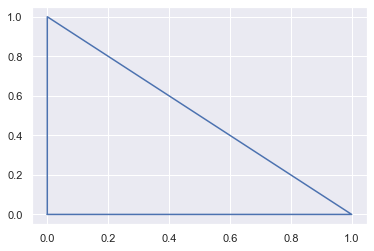

In [11]:
plt.plot([0,0,1,0], [0,1,0,0])